In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

In [2]:
np.random.seed(100)

In [3]:
# _URL = ""

# data = tf.keras.utils.get_file(_URL)

In [4]:
data = pd.read_csv('data/combined_data.csv', index_col=0)
data.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,Good case Excellent value.,1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
reviews = data['text'].tolist()

In [6]:
review_labels = data['sentiment'].tolist()


In [7]:
##split in test and train

In [8]:
split_index = int(np.ceil(len(reviews)*0.8))

train_reviews = reviews[0:split_index]
test_reviews = reviews[split_index: ]

len(train_reviews), len(test_reviews)

(1594, 398)

In [9]:
train_labels = review_labels[0 : split_index]
test_labels = review_labels[split_index : ]

len(train_labels), len(test_labels)

(1594, 398)

In [10]:
#make numpy arrays
train_labels = np.array(train_labels)
test_labels  = np.array(test_labels)

## Tokenize the reviews

In [11]:
vocab_size = 500
embedding_dim = 16
max_length = 100

In [12]:
tokenizer = Tokenizer(oov_token='<OOV>', num_words=vocab_size)

In [13]:
tokenizer.fit_on_texts(train_reviews)

In [14]:
word_index = tokenizer.word_index
print ('word_index: ' , len(word_index))

word_index:  2834


## Generate Sequence of Reviews

In [15]:
train_sequences = tokenizer.texts_to_sequences(train_reviews)

In [16]:
# train_sequences[0]

In [17]:
train_padded_sequences = pad_sequences(train_sequences, padding='post', maxlen=max_length, truncating='post')
train_padded_sequences[0]

array([ 26,  68,   7,  63, 173,  13,  67,   8, 219,   5,  16,  82,  16,
         2, 198, 364,   4,  75, 109,   6,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [18]:
len(train_padded_sequences[0])

100

In [19]:
train_reviews[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [20]:
train_sequences[0]

[26,
 68,
 7,
 63,
 173,
 13,
 67,
 8,
 219,
 5,
 16,
 82,
 16,
 2,
 198,
 364,
 4,
 75,
 109,
 6,
 1]

In [21]:
# test data

test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded_sequences = pad_sequences(test_sequences, maxlen = max_length, padding='post', truncating='post')

## Create Model

In [22]:
l0 = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length)
l1 = tf.keras.layers.Flatten()

l2 = tf.keras.layers.Dense(units=6, activation='relu')

l3 = tf.keras.layers.Dense(units=2, activation='softmax')

In [23]:
model = tf.keras.Sequential([l0, l1, l2, l3])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'], optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 9606      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 17,620
Trainable params: 17,620
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [25]:
EPOCHS = 12
history = model.fit(train_padded_sequences,
          train_labels,
          validation_data=(test_padded_sequences,test_labels),
          epochs=EPOCHS)

Epoch 1/12
50/50 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5276 - val_loss: 0.6942 - val_accuracy: 0.4749
Epoch 2/12
50/50 [==============================] - 0s 966us/step - loss: 0.6692 - accuracy: 0.5928 - val_loss: 0.6623 - val_accuracy: 0.6407
Epoch 3/12
50/50 [==============================] - 0s 949us/step - loss: 0.5969 - accuracy: 0.7566 - val_loss: 0.6237 - val_accuracy: 0.6231
Epoch 4/12
50/50 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.8130 - val_loss: 0.5521 - val_accuracy: 0.7337
Epoch 5/12
50/50 [==============================] - 0s 981us/step - loss: 0.3707 - accuracy: 0.8639 - val_loss: 0.4995 - val_accuracy: 0.7588
Epoch 6/12
50/50 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.8984 - val_loss: 0.5326 - val_accuracy: 0.7362
Epoch 7/12
50/50 [==============================] - 0s 976us/step - loss: 0.2407 - accuracy: 0.9197 - val_loss: 0.5063 - val_accuracy: 0.7613
Epoch 8/12
5

## Visualizing the Network

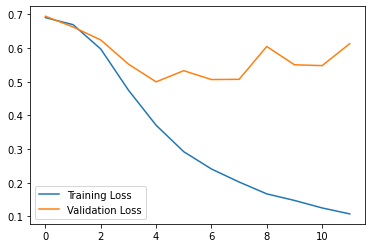

In [26]:
rng = range(0,EPOCHS)
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(rng, loss , label='Training Loss')
plt.plot(rng, val_loss , label='Validation Loss')

plt.legend()
plt.show()

In [27]:
# tuple_list = [(value, key) for (key, value) in word_index.items()]

# reverse_word_index = dict(tuple_list)

reverse_word_index  = {}
for key, value in word_index.items():
    reverse_word_index[value] = key


In [28]:
embeddig_weights = l0.get_weights()[0]
embeddig_weights.shape

(500, 16)

In [29]:
import io

# embedding vectors and meta-data
out_v = io.open('vec.tsv', 'w', encoding='utf-8')  # contains weigh vector of each word
out_m = io.open('meta.tsv', 'w', encoding='utf-8') # contain word


In [30]:
#tab delimited 
'\t'.join([str(x) for x in embeddig_weights[1]])

'-0.055972103\t-0.02750427\t-0.10450471\t-0.0330231\t0.041194204\t-0.0037321611\t0.0012235629\t-0.030764295\t0.03157368\t-0.02144574\t0.07228209\t-0.07070667\t0.09810146\t0.017485261\t0.0019680595\t-0.066984124'

In [31]:
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embedding = embeddig_weights[word_num]
    
    out_m.write(word+"\n")
    out_v.write('\t'.join([str(x) for x in embeddig_weights[1]]) + "\n")

out_v.close()
out_m.close()

## Predicting Sentiments

In [32]:
fake_reviews =['I love chocolate', 
              'This restaurant sucks',
              'OMG, what a shake!', 
              'Totally recommend this place for grilled sandwitches', 
              'I would lose my license instead of standing in long lines', 
               'please never come to this fish market, it smells too bad']

fake_reviews

['I love chocolate',
 'This restaurant sucks',
 'OMG, what a shake!',
 'Totally recommend this place for grilled sandwitches',
 'I would lose my license instead of standing in long lines',
 'please never come to this fish market, it smells too bad']

In [33]:
fake_seq = tokenizer.texts_to_sequences(fake_reviews)
fake_pad_seq = pad_sequences(fake_seq, maxlen=max_length, padding='post', truncating='post')

In [34]:
classes = model.predict(fake_pad_seq)
            

In [35]:
for i in range(0, len(fake_reviews)):
    print(fake_reviews[i])
    print(classes[i])
    print('\n')

I love chocolate
[0.00203486 0.9979652 ]


This restaurant sucks
[0.7486624  0.25133756]


OMG, what a shake!
[0.22615594 0.77384406]


Totally recommend this place for grilled sandwitches
[0.06588319 0.9341168 ]


I would lose my license instead of standing in long lines
[0.16253641 0.83746356]


please never come to this fish market, it smells too bad
[0.99429566 0.00570434]


